<h1><center>CSE391  Data Science</center></h1>

<h1><center>Lecture 5</center></h1>
<h1><center>Sept 12th ,2018 </center></h1>


# Jupyter notebook tips of the day
- sharing notebooks
- Run code from a different kernel in a notebook
> Just use IPython Magics with the name of your kernel at the start of each cell that you want to use that Kernel for:

- %%bash
- %%HTML
- %%python2
- %%python3
- %%ruby
- %%perl


In [ ]:
%%bash
for i in {1..5}
do
   echo "i is $i"
done

# Reading mat file in Python
 - you may need for your course project to read some mat files
 - here are two methods to read a mat file in Python

In [ ]:
## mat file  earlier than v7.3
import scipy.io
mat = scipy.io.loadmat('file.mat')

# mat file v7.3
import numpy as np
import h5py 
f = h5py.File('somefile.mat','r') 
data = f.get('data/variable1') 
data = np.array(data) # For converting to numpy array

## Is the estimation the same or close the actual values?
- If the sample is not representative of the population being studied, the sample statistic may be biased so you cannot use it to make valid inferences about the population parameter
- To minimise bias the sample should be chosen by random sampling from a list of all individuals in the relevant population. This list is called the sampling frame. It is essential.


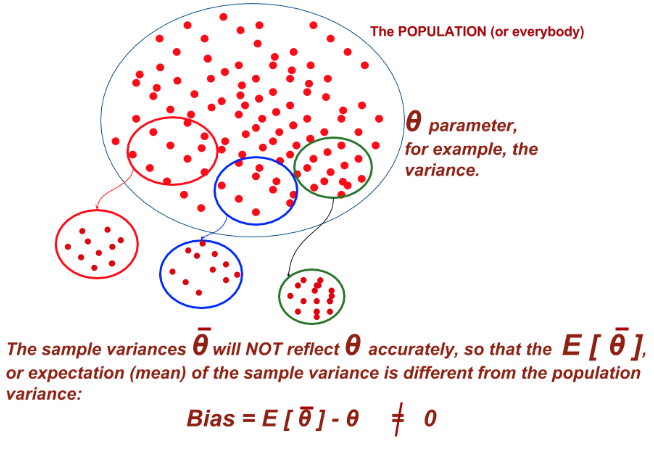

#  Bias and Variance in Statistical Inference

# # Conceptual Definition
- Error due to Bias: The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Of course you only have one model so talking about expected or average prediction values might seem a little strange. However, imagine you could repeat the whole model building process more than once: each time you gather new data and run a new analysis creating a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. Bias measures how far off in general these models' predictions are from the correct value.
- Error due to Variance: The error due to variance is taken as the variability of a model prediction for a given data point. Again, imagine you can repeat the entire model building process multiple times. The variance is how much the predictions for a given point vary between different realizations of the model.

SRC : Scott Fortmann-Roe

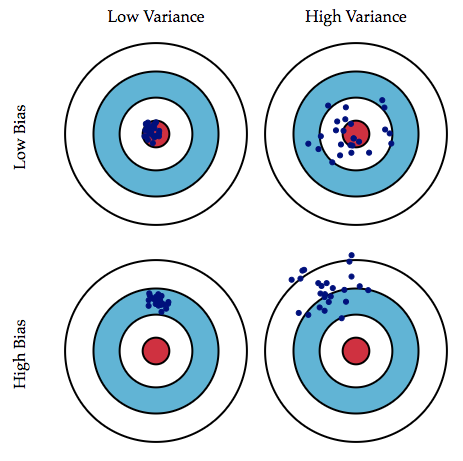

# Probability Distribution

- is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. 
- There are many different types of probability distributions in statistics including:

- Basic probability distributions which can be shown on a probability distribution table.

- Binomial distributions, which have “Successes” and “Failures.”
- Normal distributions, sometimes called a Bell Curve.

### Some popular probability distribution: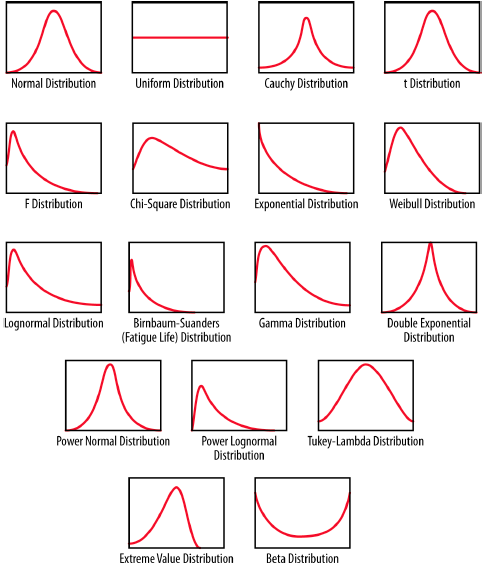

## Why Probability distribution is important?
- if we know the PD that governs a process(model) we can make prediction about that process(model)

# Some important statistics:

## Expected Values
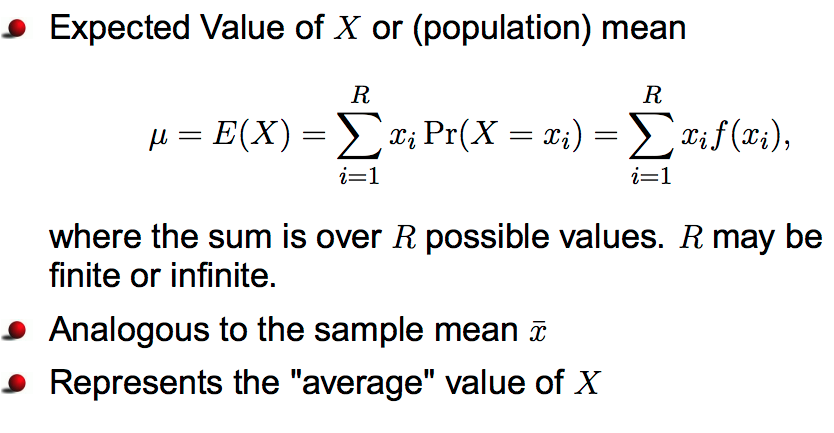

## Variance

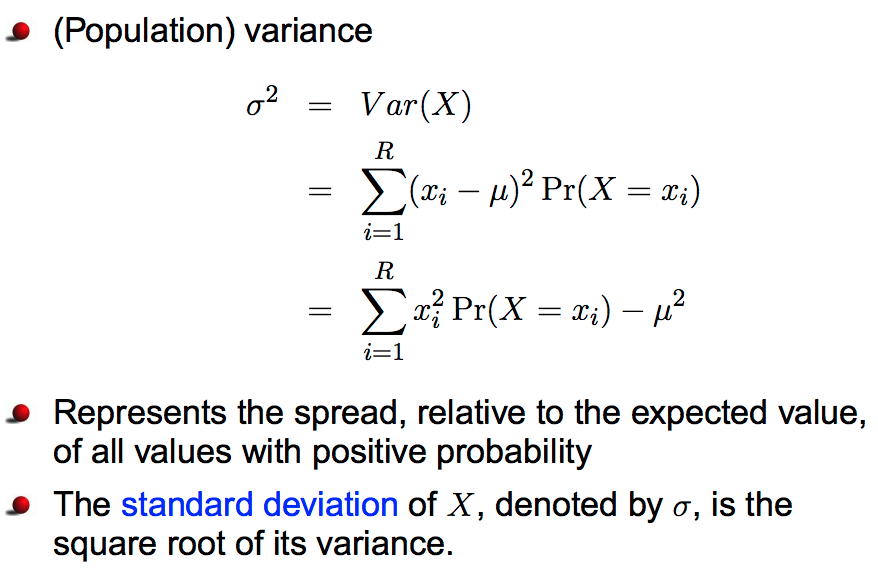

## Sample Mean and Variance
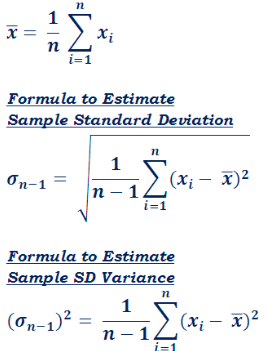

# Normal (Gaussian) Distribution 
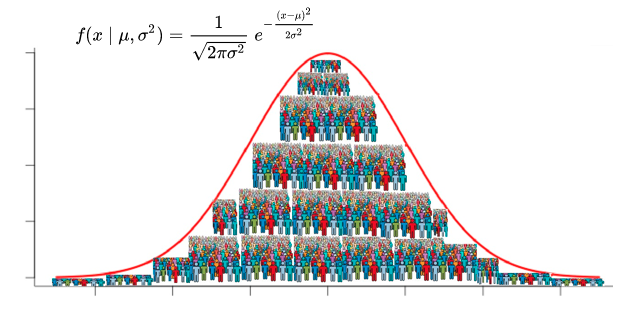

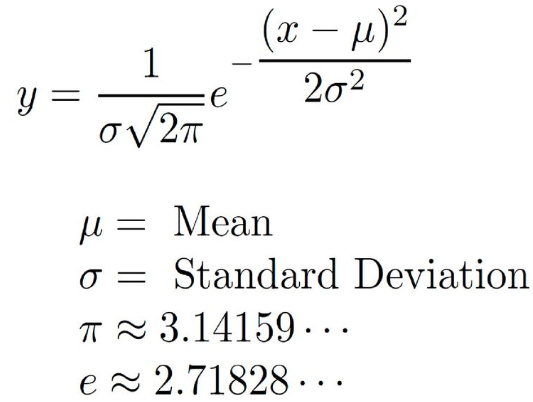

# Joint Probability
## So far you have mainly studied one dimensional probabilities but data are multi-dimensional. How to deal with the multi-dimensional probabilities?
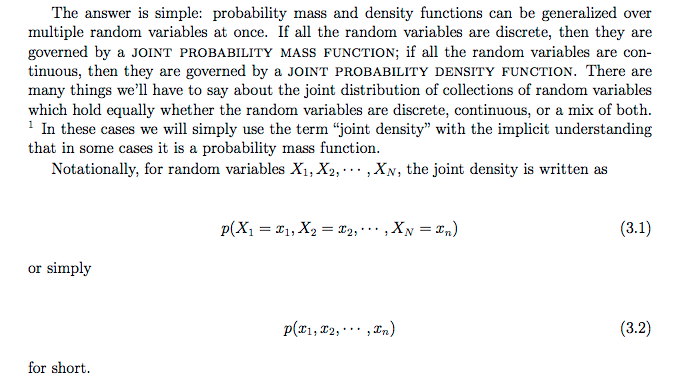


 # Independence  of random variables
 ###  Two events are independent, statistically independent, or stochastically independent if the occurrence of one does not affect the probability of occurrence of the other.  Similarly, two random variables are independent if the realization of one does not affect the probability distribution of the other.
 
 - If two random variables are independent then
 
 $\huge p(x_1,x_2) = p(x_1)\times p(x_2)$
 
 - For $N$ independent random variables:
 
 $\huge p(x_1,x_2,\ldots,x_N) =  \prod_{i=1}^N p(x_i)$

# Conditional Probability

## Conditional probability is a measure of the probability of an event (some particular situation occurring) given that (by assumption, presumption, assertion or evidence) another event has occurred

$\huge p(x_1|x_2) = \frac{p(x_1,x_2)}{p(x_2)}$

## Bayes' Rule

$\huge p(x_1|x_2) = \frac{p(x_2|x_1)p(x_1)}{p(x_2)}$


- Bayes rule provides us with a way to update our beliefs based on the arrival of new, relevant pieces of evidence. For example, if we were trying to provide the probability that a given person has cancer, we would initially just say it is whatever percent of the population has cancer. However, given additional evidence such as the fact that the person is a smoker, we can update our probability, since the probability of having cancer is higher given that the person is a smoker. This allows us to utilize prior knowledge to improve our probability estimations.

- $\huge p(x_1|x_2)$: posterior probability
- $\huge p(x_2|x_1)$: likelihood
- $\huge p(x_1)$: prior
- $\huge p(x_2)$: Marginal likelihood


## Bayes’ Theorem Example #1
You might be interested in finding out a patient’s probability of having liver disease if they are an alcoholic. “Being an alcoholic” is the test (kind of like a litmus test) for liver disease.

A could mean the event “Patient has liver disease.” Past data tells you that 10% of patients entering your clinic have liver disease. P(A) = 0.10.
B could mean the litmus test that “Patient is an alcoholic.” Five percent of the clinic’s patients are alcoholics. P(B) = 0.05.
You might also know that among those patients diagnosed with liver disease, 7% are alcoholics. This is your B|A: the probability that a patient is alcoholic, given that they have liver disease, is 7%.
Bayes’ theorem tells you:
P(A|B) = (0.07 * 0.1)/0.05 = 0.14
In other words, if the patient is an alcoholic, their chances of having liver disease is 0.14 (14%). This is a large increase from the 10% suggested by past data. But it’s still unlikely that any particular patient has liver disease.
[SRC](http://www.statisticshowto.com/bayes-theorem-problems/)

## Let's Consider a Two-dimensional Normal Distribution
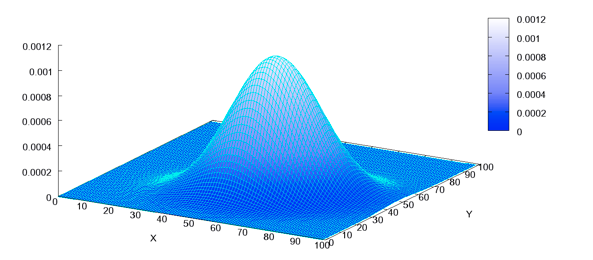

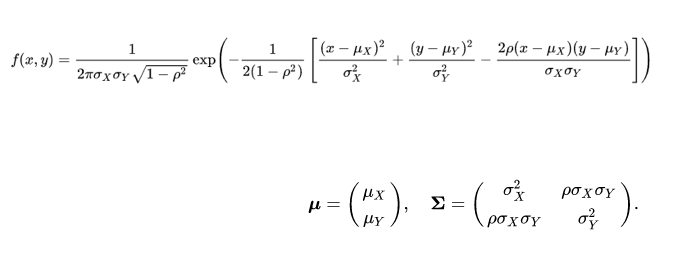

### Vectorized form of a multi-variate (multi-dimensional) normal distribution
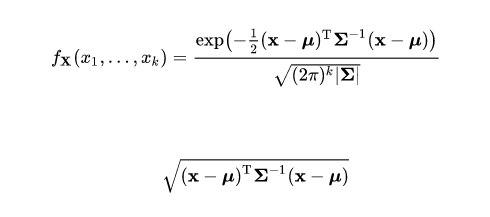

### Python multivariate distribution 

In [3]:

from scipy.stats import multivariate_normal 
x = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
x.pdf([1,0])


0.096532352630053928

### Implementing MVN in Python (example) 


In [3]:
from numpy import *
import math
# covariance matrix
sigma = matrix([[2.3, 0, 0, 0],
           [0, 1.5, 0, 0],
           [0, 0, 1.7, 0],
           [0, 0,   0, 2]
          ])
# mean vector
mu = array([2,3,8,10])

# input
x = array([2.1,3.5,8, 9.5])

def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = linalg.det(sigma)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")

        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = matrix(x - mu)
        inv = sigma.I        
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")

print(norm_pdf_multivariate(x, mu, sigma))

0.006378411393413104


In [ ]:
import numpy as np

def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

def test_gauss_pdf():
    x = np.array([[0],[0]])
    mu  = np.array([[0],[0]])
    cov = np.eye(2) 

    print(pdf_multivariate_gauss(x, mu, cov))

    # prints 0.15915494309189535

if __name__ == '__main__':
    test_gauss_pdf()